In [56]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2

In [57]:
NUM_CLASSES = 17

IMAGE_SIZE = 32

DATASET_PATH = "data/pokemon_per_type"

In [58]:
# Creating the model
model=Sequential()
model.add(Convolution2D(32,(5,5),input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),activation='relu', padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(5,5),activation='relu', padding = "same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(units=NUM_CLASSES,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 4096)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)             

In [60]:
learning_rate = 0.001
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = learning_rate), loss= 'categorical_crossentropy', metrics= ['accuracy'])


In [61]:
def to_lab(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    return lab_image

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                   preprocessing_function = to_lab)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function = to_lab)

training_set = train_datagen.flow_from_directory(DATASET_PATH + '/train', 
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
                                                    batch_size = 100)
test_set = test_datagen.flow_from_directory(DATASET_PATH + '/val',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = 100)

Found 633 images belonging to 17 classes.
Found 173 images belonging to 17 classes.


In [64]:
nb_epochs = 1000
fitted_model = model.fit(training_set,
                        epochs = nb_epochs,
                        validation_data = test_set)

Epoch 1/1000
7/7 [==============================] - 3s 398ms/step - loss: 2.6380 - accuracy: 0.1532 - val_loss: 5.1806 - val_accuracy: 0.1618
Epoch 2/1000
7/7 [==============================] - 3s 448ms/step - loss: 2.6437 - accuracy: 0.1517 - val_loss: 5.1257 - val_accuracy: 0.1503
Epoch 3/1000
7/7 [==============================] - 3s 399ms/step - loss: 2.6514 - accuracy: 0.1501 - val_loss: 4.7431 - val_accuracy: 0.1618
Epoch 4/1000
7/7 [==============================] - 3s 414ms/step - loss: 2.6402 - accuracy: 0.1532 - val_loss: 4.9921 - val_accuracy: 0.1676
Epoch 5/1000
7/7 [==============================] - 3s 440ms/step - loss: 2.6387 - accuracy: 0.1548 - val_loss: 5.6904 - val_accuracy: 0.1561
Epoch 6/1000
7/7 [==============================] - 3s 440ms/step - loss: 2.6475 - accuracy: 0.1532 - val_loss: 5.2415 - val_accuracy: 0.0809
Epoch 7/1000
7/7 [==============================] - 3s 393ms/step - loss: 2.6479 - accuracy: 0.1548 - val_loss: 5.2264 - val_accuracy: 0.0809
Epoch 

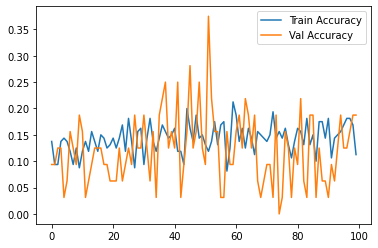

In [ ]:
plt.figure()
plt.plot([i for i in range(nb_epochs)],fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot([i for i in range(nb_epochs)],fitted_model.history['val_accuracy'], label = "Validation Accuracy")
plt.legend()

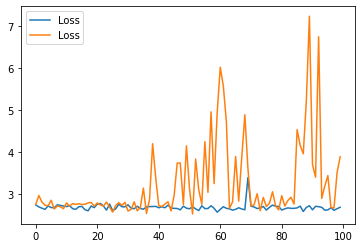

In [ ]:
plt.figure()
plt.plot([i for i in range(nb_epochs)],fitted_model.history['loss'], label = "Training Loss")
plt.plot([i for i in range(nb_epochs)],fitted_model.history['val_loss'], label = "Validation Loss")
plt.legend()

In [ ]:
def pred(image_path):
    image = Image.open(image_path)
    image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
    x = np.array(image)
    x = np.expand_dims(x,axis=0)
    c = np.argmax(model.predict(x), axis=1)
    l = os.listdir(DATASET_PATH + '/train')
    l.sort()
    return l[c[0]]


pred(DATASET_PATH + '/train/Bug/accelgor.png')

FileNotFoundError: [Errno 2] No such file or directory: 'data/pokemon_per_type/train/Dragon/dialga.jpg'